In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_core', '_decorators', '_docstrings', '_orig_rc_params', '_statistics', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'factorplot', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'pairplot', 'palettes', 'pal

In [3]:
md = pd.read_csv('IMDB_movie_reviews_details.csv')
md.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [4]:
md.tail()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
995,995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,"169,575",NaN
996,996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,"34,759",NaN
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M
998,998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...","44,086",$30.50M
999,999,Lifeboat,1944,97,"Drama, War",7.6,78.0,Several survivors of a torpedoed merchant ship...,"26,903",NaN


In [5]:
md.isnull().sum()

Unnamed: 0      0
name            0
year            0
runtime         0
genre           0
rating          0
metascore     159
timeline        0
votes           0
gross         171
dtype: int64

In [6]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   name        1000 non-null   object 
 2   year        1000 non-null   object 
 3   runtime     1000 non-null   int64  
 4   genre       1000 non-null   object 
 5   rating      1000 non-null   float64
 6   metascore   841 non-null    float64
 7   timeline    1000 non-null   object 
 8   votes       1000 non-null   object 
 9   gross       829 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [7]:
md['gross'] = md['gross'].fillna(md['gross'].dropna().mode().values[0] )
md['metascore'] = md['metascore'].fillna(md['metascore'].dropna().mean() )

In [8]:
md.isnull().sum()

Unnamed: 0    0
name          0
year          0
runtime       0
genre         0
rating        0
metascore     0
timeline      0
votes         0
gross         0
dtype: int64

In [9]:
md.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.000000,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.000000,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,78.158145,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",$0.01M
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.000000,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.000000,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [10]:
md.reset_index(inplace=True)

In [11]:
md.describe()

,index,Unnamed: 0,runtime,rating,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,123.017000,7.954000,78.158145
std,288.819436,288.819436,28.212598,0.276008,11.268938
min,0.000000,0.000000,45.000000,7.600000,28.000000
25%,249.750000,249.750000,103.000000,7.700000,72.000000
50%,499.500000,499.500000,119.000000,7.900000,78.158145
75%,749.250000,749.250000,137.000000,8.100000,86.000000
max,999.000000,999.000000,321.000000,9.300000,100.000000


In [12]:
musty = md[['genre','rating']]
musty

,genre,rating
0,Drama,9.3
1,"Crime, Drama",9.2
2,Drama,9.1
3,"Action, Crime, Drama",9.0
4,"Crime, Drama",9.0
...,...,...
995,"Comedy, Drama, Romance",7.6
996,"Drama, Western",7.6
997,"Drama, Western",7.6
998,"Drama, Romance, War",7.6


In [13]:
# 1. GENRE WITH HIGHEST RATING
musty.iloc[:1]

,genre,rating
0,Drama,9.3


C:\Users\MUSTAPHA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MUSTAPHA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MUSTAPHA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MUSTAPHA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MUSTAPHA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3

<AxesSubplot:xlabel='rating', ylabel='index'>

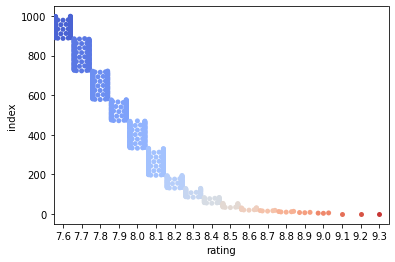

In [17]:
# 2. GRAPH SHOWING FROM LOWEST TO HIGHEST MOVIES WITH THEIR RATING 

sns.swarmplot(x=md['rating'],y =md['index'], palette='coolwarm')

In [19]:
# 3. TOTAL NUMBER OF MOVIES RELEASED FROM 2008 TO 2019
akm=md.sort_values('year')

In [20]:
aba=akm.tail(30)

In [21]:
# The total number of movies relaesed from 2008 to 2019 is (25)
aba

,index,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
780,780,780,Crash,I 2004,112,"Crime, Drama, Thriller",7.7,66.000000,Los Angeles citizens with vastly separate live...,"423,089",$54.58M
784,784,784,Ray,I 2004,152,"Biography, Drama, Music",7.7,73.000000,The story of the life and career of the legend...,"140,336",$75.33M
383,383,383,The Sea Inside,I 2004,126,"Biography, Drama",8.0,74.000000,"The factual story of Spaniard Ramon Sampedro, ...","78,483",$2.09M
925,925,925,The Visitor,I 2007,104,Drama,7.6,79.000000,A college professor travels to New York City t...,"41,807",$9.42M
626,626,626,Once,I 2007,86,"Drama, Music, Romance",7.8,88.000000,A modern-day musical about a busker and an imm...,"111,811",$9.44M
624,624,624,Taken,I 2008,90,"Action, Crime, Thriller",7.8,51.000000,A retired CIA agent travels across Europe and ...,"570,887",$145.00M
623,623,623,The Fighter,I 2010,116,"Biography, Drama, Sport",7.8,79.000000,"Based on the story of Micky Ward, a fledgling ...","345,726",$93.62M
765,765,765,Flipped,I 2010,90,"Comedy, Drama, Romance",7.7,45.000000,Two eighth-graders start to have feelings for ...,"82,993",$1.75M
630,630,630,Drive,I 2011,100,"Crime, Drama",7.8,78.000000,A mysterious Hollywood stuntman and mechanic m...,"582,181",$35.06M
489,489,489,The Artist,I 2011,100,"Comedy, Drama, Romance",7.9,89.000000,An egomaniacal film star develops a relationsh...,"233,136",$44.67M


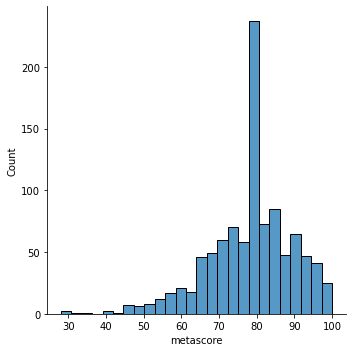

In [22]:
# 4. A CHART SHOWING THE METASCORE PER CARTEGORY
sns.displot(x=md['metascore'])

In [23]:
# 5. THE PERCENTAGE OF GAMES THAT GOT A 9+ RATING

mds = (3/1000)*100

In [24]:
# therefore, games that got 9+ rating is 0.3% 
mds

0.3

In [25]:
# 6. THE PERCENTAGE OF MOVIES RELEASED FOR EACH OF THIS YEAR(2010 TO 2020)

In [26]:
# 8. A GRAHP SHOW THE NAME OF MOVIES NAME WITH SAME RUNTIME


In [27]:
m2 =np.arange(1,101)